# Explore a timeseries generated by ncrcat

To start getting familiar with E3SM output for CO2 variables, and to explore patterns in the output.  
This notebook is a first step towards comparing the model output with observations.

#### Data sources

**Model**: e3sm test_co2 run output from the test code that Bryce passed to me.
* runscript (`test_co2_hist_files_ne30pg2_take3.sh.sh`), with options  
    ○ casename=test_co2_hist_files_ne30pg2_take3.sh  
    ○ --compset FC5AV1C-04P2  
    ○ --res ne30pg2_ne30pg2  
    ○ CAM_CONFIG_OPTS="-co2_cycle"  
    ○ RUN_STARTDATE=1950-02-14  
    ○ STOP_N=4  
    ○ RESUBMIT=2  
    ○ STOP_OPTION=nmonths  
* History files concatenated using `ncrcat -h -v`  
* Then regridded using `ncremap -m /compyfs/zender/maps/map_ne30pg2_to_cmip6_180x360_nco.20200201.nc`

#### Changes
- 2020 August: Created  
- 2020 September: Changed from using `area_p` to `area` for the weighting  

#### Style notes

<br>
<i>Note these header symbols for marking status:</i>
<li> 🟩 means section is still in progress </li>
<li> ✅ means section has been completed </li>
<br>
<i>Note these naming conventions:</i>
<li> <code>arr_</code> means a numpy array </li>
<li> <code>ds_</code> means an xArray DataSet </li>
<li> <code>da_</code> means a xArray DataArray </li>
<li> <code>df_</code> means a pandas DataFrame </li>

## Setup

In [1]:
import os
from textwrap import wrap

In [2]:
import datetime as dt
from datetime import date

today = date.today()

In [3]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr

In [4]:
import matplotlib
from matplotlib import cm
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

In [5]:
# import cartopy.crs as ccrs
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

***Set up plotting fonts and use latex formatting***

In [6]:
# rc('text', usetex=True)# use latex for font rendering
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans serif"]})
matplotlib.rcParams.update({'font.size': 18})

In [7]:
import re

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
    }
    regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

## Data import

In [8]:
# datadir  = '/Users/kauf418/projects/e3sm_co2_transport_evaluation/2_ExperimentFolder/model_output/test_co2_hist_files_ne30pg2_take3/'
# rgr_file = 'test_co2_hist_files_take3_rgr_cmip6_180x360_record.CO2.nc'

In [9]:
datadir  = '/global/cscratch1/sd/beharrop/people/for_danny/'
nat_file = 'test_co2_hist_files_ne30pg2_take3_record.CO2.nc'
rgr_file = 'test_co2_hist_files_take3_rgr_cmip6_180x360_record.CO2.nc'

In [10]:
ds = xr.open_dataset(datadir + rgr_file, decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (ilev: 73, lat: 180, lev: 72, lon: 360, nbnd: 2, time: 12)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * ilev       (ilev) float64 0.1 0.1477 0.218 0.3219 ... 990.5 997.0 1e+03
  * lev        (lev) float64 0.1238 0.1828 0.2699 0.3986 ... 986.2 993.8 998.5
  * time       (time) float64 15.0 46.0 76.0 107.0 ... 260.0 290.0 321.0 352.0
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds   (lat, nbnd) float64 ...
    lon_bnds   (lon, nbnd) float64 ...
    gw         (lat) float64 ...
    area       (lat, lon) float64 ...
    AFCO2      (time, lev, lat, lon) float32 ...
    CO2        (time, lev, lat, lon) float32 ...
    LANDFRAC   (time, lat, lon) float32 ...
    OCNFRAC    (time, lat, lon) float32 ...
    P0         float64 ...
    PS         (time, lat, lon) float32 ...
    SFCO2      (time, lat, lon) float32 ...
    SFCO2_FFF  (time, lat, lon) float32 ...
    SFCO2_LND  (time, lat, lon) float32 ...
    SFCO2_OCN  (time, lat, lon) float32 ...
    T          (time, lev, lat, lon) float32 ...
    TAFCO2     (time, lat, lon) float32 ...
    TMCO2      (time, lat, lon) float32 ...
    TMCO2_FFF  (time, lat, lon) float32 ...
    TMCO2_LND  (time, lat, lon) float32 ...
    TMCO2_OCN  (time, lat, lon) float32 ...
    TROP_P     (time, lat, lon) float32 ...
    TROP_T     (time, lat, lon) float32 ...
    TS         (time, lat, lon) float32 ...
    area_p     (lat, lon) float64 ...
    hyai       (ilev) float64 ...
    hyam       (lev) float64 ...
    hybi       (ilev) float64 ...
    hybm       (lev) float64 ...
    time_bnds  (time, nbnd) float64 ...
Attributes:
    ne:                        30
    fv_nphys:                  2
    Conventions:               CF-1.0
    source:                    CAM
    case:                      test_co2_hist_files_ne30pg2_take3
    title:                     UNSET
    logname:                   kauf418
    host:                      
    Version:                   $Name$
    revision_Id:               $Id$
    initial_file:              /compyfs/inputdata/atm/cam/inic/homme/cami_mam...
    topography_file:           /compyfs/inputdata/atm/cam/topo/USGS-gtopo30_n...
    time_period_freq:          month_1
    history:                   Thu Aug 20 10:02:41 2020: ncks -O -t 2 --no_tm...
    remap_script:              ncremap
    remap_hostname:            compy01.pnl.gov
    remap_version:             4.9.3
    NCO:                       netCDF Operators version 4.9.3 (Homepage = htt...
    nco_openmp_thread_number:  2
    map_file:                  /compyfs/zender/maps/map_ne30pg2_to_cmip6_180x...
    input_file:                /compyfs/kauf418/e3sm_scratch/test_co2_hist_fi...

In [11]:
ds_nat = xr.open_dataset(datadir + nat_file) #, decode_times=False)

## Wrangling

##### Convert E3SM $CO_2$ $kg/kg$ to $ppm$

\begin{array}{lllll}
      & CO_2\,molar\,mass & \times dry-air\,molar\,mass & \times ppm \\
    ppmfac = & \frac{1\,kmol_{CO_2}}{44.01\,kg_{CO_2}} & \times \frac{28.9647\,kg_{air}}{1\,kmol_{air}} & \times \frac{1e6\,mol_{air}}{1\,mol_{CO_2}}
\end{array}

\begin{align}
    CO_2\,dry\,air\,mass\,fraction\,(i.e. \frac{kg_{CO_2}}{kg_{air}}) \times ppmfac & = ppm \\
\end{align}

<!-- \begin{array}{lllll}
    CO_2\,dry-air\,mass\,fraction  & \times ppmfac & = ppm \\
    \frac{kg_{CO_2}}{kg_{air}} & \times ppmfac & = ppm
\end{array} -->

In [12]:
mwco2 = 44.01
mwdry  = 28.9647
mwfac  = mwdry / mwco2
ppmfac = mwfac * 1e6

In [13]:
# before unit conversion
ds['CO2'].mean().values.item()

0.0005618716822937131

In [14]:
temp_long_name = ds['CO2'].long_name

# do the conversion
ds['CO2'] = ds['CO2']*ppmfac
ds['CO2'].attrs["units"] = 'ppm'
ds['CO2'].attrs['long_name'] = temp_long_name

print(f"min: {ds['CO2'].min().values.item()}")
print(f"mean: {ds['CO2'].mean().values.item()}")
print(f"max: {ds['CO2'].max().values.item()}")
print(f"shape: {ds['CO2'].mean(dim='lev').shape}")

min: 358.03765869140625
mean: 369.7906799316406
max: 384.5345458984375
shape: (12, 180, 360)


let's look at a summary of units and totals

In [15]:
co2names = dict()
co2names['3d_concentration'] = ['CO2']  #,'CO2_LND','CO2_OCN','CO2_FFF']
co2names['3d_fluxes'] = ['AFCO2']
co2names['column_integrated_mass']  = ['TMCO2','TMCO2_LND','TMCO2_OCN','TMCO2_FFF']
co2names['2d_fluxes'] = ['SFCO2','SFCO2_LND','SFCO2_OCN','SFCO2_FFF', 'TAFCO2']

In [16]:
def varlist_summary(varlist):
    for v in varlist:
        print(f"[{v}] {ds[v].attrs['long_name']} ({ds[v].attrs['units']})")
        print(" " + f"sum={ds[v].sum().values}")

In [17]:
varlist_summary(co2names['3d_concentration'])

[CO2] CO2 (ppm)
 sum=20703545344.0


In [18]:
varlist_summary(co2names['3d_fluxes'])

[AFCO2] CO2 column aircraft flux (kg/m2/s)
 sum=2.961937298096018e-06


In [19]:
varlist_summary(co2names['column_integrated_mass'])

[TMCO2] CO2 column burden (kg/m2)
 sum=4295495.5
[TMCO2_LND] CO2_LND column burden (kg/m2)
 sum=4291718.5
[TMCO2_OCN] CO2_OCN column burden (kg/m2)
 sum=4291718.5
[TMCO2_FFF] CO2_FFF column burden (kg/m2)
 sum=4296377.0


In [20]:
varlist_summary(co2names['2d_fluxes'])

[SFCO2] CO2 surface flux (kg/m2/s)
 sum=0.0002707056701183319
[SFCO2_LND] CO2_LND surface flux (kg/m2/s)
 sum=0.0
[SFCO2_OCN] CO2_OCN surface flux (kg/m2/s)
 sum=0.0
[SFCO2_FFF] CO2_FFF surface flux (kg/m2/s)
 sum=0.0002707056701183319
[TAFCO2] CO2 column-integrated aircraft flux (kg/m2/s)
 sum=2.9619418455695268e-06


In [21]:
# flatten list of CO2 variables
var_list = sorted({x for v in co2names.values() for x in v})
var_list

['AFCO2',
 'CO2',
 'SFCO2',
 'SFCO2_FFF',
 'SFCO2_LND',
 'SFCO2_OCN',
 'TAFCO2',
 'TMCO2',
 'TMCO2_FFF',
 'TMCO2_LND',
 'TMCO2_OCN']

### Global means with weighting by area

xarray has recently introduced a weighting method (http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html).  The area of each grid cell for the ne4pg2/ne30pg2 grids is called “area_p”.  For the ne4/ne30 grids it is just called “area”.  Not sure why they changed it.

**Global means** (`glmean_...`) are

\begin{align*}
    && \texttt{glmean_CO2var}_{t}= & \frac{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{CO2var}_{i,j,t} * \texttt{area}_{i,j}}{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{area}_{i,j}}     &&\forall t, \\
    with\,units: && \{kg/m^2\}_t= & \frac{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{kg/{m^2}\}_{i,j,t} * \{m^2/m^2\}_{i,j}}{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{m^2/m^2\}_{i,j}}     &&\forall t. \\
\end{align*}

*notes:*
- we would need to multiply by the radius of Earth ($R^2_{E}$ in units of $\{m^2\}$) to get to $kg$ because `area` is in steradians rather than $m^2$.
- the above multiplication by `area` ($m^2/m^2$) is taken care of in the xarray.DataArray.weighted() method.

In [22]:
for var in var_list:
    ds['glmean_' + var] = ds[var].weighted(ds['area']).mean(('lat','lon'))

compare weighted vs unweighted mean timeseries

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


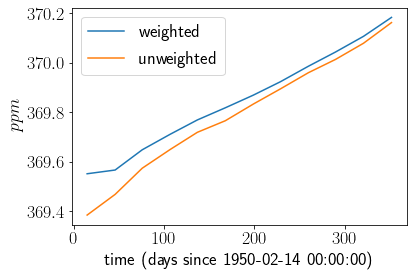

In [23]:
plt.plot(ds['time'], ds['glmean_CO2'].mean(dim=("lev")), label="weighted")
plt.plot(ds['time'], ds['CO2'].mean(dim=("lat", "lon", "lev")), label="unweighted")
#
plt.xlabel(f"{ds['time'].attrs['long_name']} ({ds['time'].attrs['units']})")
plt.ylabel(f"$ppm$")
plt.legend()

# ---- Save ----
savename = 'lineplot_of_co2_timeseries_from_e3sm_weighted_vs_unweighted_' + \
            today.strftime("%Y%m%d") + '.pdf'
# plt.savefig(savename, bbox_inches='tight')

Now with the native grid file...

In [24]:
var_list = ['CO2', 'TMCO2', 'TMCO2_FFF', 'SFCO2', 'SFCO2_FFF', 'SFCO2_LND', 'SFCO2_OCN', 'TAFCO2']
for var in var_list:
    ds_nat['gl_' + var] = ds_nat[var].weighted(ds_nat['area_p']).mean('ncol')
    ds_nat['glsum_' + var] = ds_nat[var].weighted(ds_nat['area_p']).sum('ncol')

### Global sums with weighting by area

In [25]:
# Constants are declared.
r_earth = 6.37122e6  # value from the Common Infrastructure for Modeling the Earth (CIME)
surface_area_earth = 4*np.pi*r_earth**2

In [26]:
for var in var_list:
    ds['glsum_' + var]   = ds[var].weighted(ds['area']).sum(('lat','lon'))

**Total global CO2 mass** (`glsum_TMCO2...`) is

\begin{align*}
    && \texttt{glsum_TMCO2}_{t}= & \sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{TMCO2}_{i,j,t} * \texttt{area}_{i,j}     &&\forall t, \\
    with\,units: && \{kg/m^2\}_t= & \sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{kg/{m^2}\}_{i,j,t} * \{m^2/m^2\}_{i,j}     &&\forall t. \\
\end{align*}

*notes:*
- we would need to multiply by the radius of Earth ($R^2_{E}$ in units of $\{m^2\}$) to get to $kg$ because `area` is in steradians rather than $m^2$.
- the above multiplication by `area` ($m^2/m^2$) is taken care of in the xarray.DataArray.weighted() method.

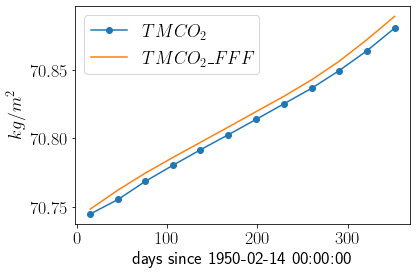

In [27]:
plt.plot(ds['time'], ds['glsum_TMCO2'], '-o', label='$TMCO_2$')
plt.plot(ds['time'], ds['glsum_TMCO2_FFF'], label='$TMCO_2\_FFF$')
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2$")
plt.legend()
plt.show()

**Total global CO2 surface flux** (`glsum_SFCO2...`) is

\begin{align*}
    && \texttt{glsum_SFCO2}_{t}= & \sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{SFCO2}_{i,j,t} * \texttt{area}_{i,j}     &&\forall t, \\
    with\,units: && \{kg/m^2/s\}_t= & \sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{kg/{m^2}/s\}_{i,j,t} * \{m^2/m^2\}_{i,j}     &&\forall t. \\
\end{align*}

*notes:*
- we would need to multiply by the radius of Earth ($R^2_{E}$ in units of $\{m^2\}$) to get to $kg/s$ because `area` is in steradians rather than $m^2$.
- the above multiplication by `area` ($m^2/m^2$) is taken care of in the xarray.DataArray.weighted() method.

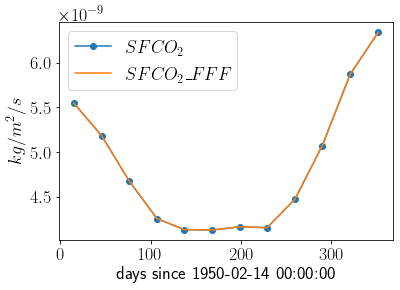

In [28]:
plt.plot(ds['time'], ds['glsum_SFCO2'], '-o', label='$SFCO_2$')
plt.plot(ds['time'], ds['glsum_SFCO2_FFF'], label='$SFCO_2\_FFF$')
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2/s$")
plt.legend()
plt.show()

# Plot

## Timeseries

### ✅ For each atmospheric level

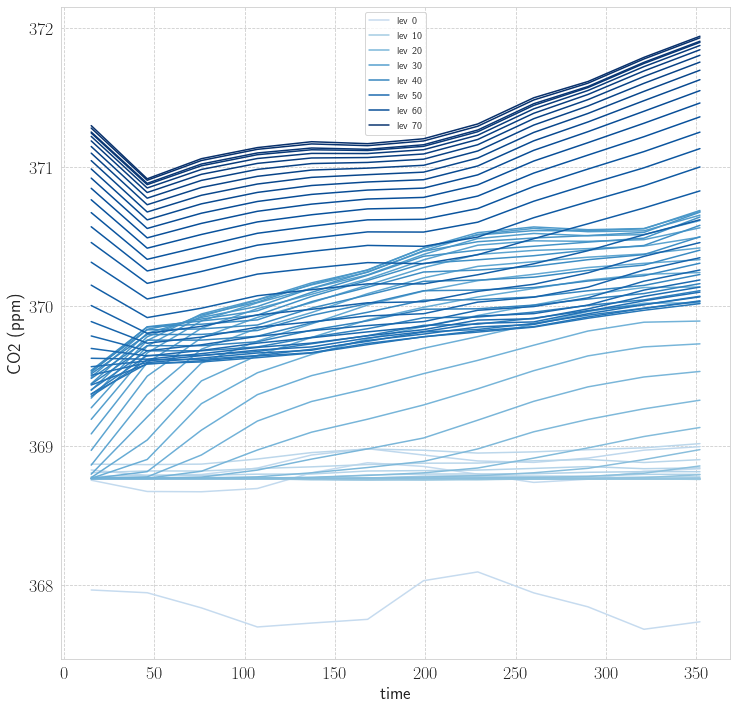

In [29]:
# ---- Prep the dataset ----
# -selections-
yv = ds['glmean_CO2']
yv_name = ds['CO2'].long_name
yv_unit = 'ppm'

xv = ds['time']
xv_name = 'time'
xv_unit = ds['time'].attrs['units']

# -calculations-
prepped_data = yv


# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(12, 12))

# ---- Prepare colors ----
colors = plt.cm.Blues(np.linspace(0.25, 1, len(ds['lev'])))

# ---- Plot ----
for i, lvl in enumerate(ds['lev']):
    ph = sns.lineplot(xv, prepped_data.isel(lev=i), 
                      ax=ax, color=colors[i], label=f'lev {i}')

# ---- Set up figure properties ----
# ylbl = '\n'.join(wrap(my_var_longname, 38))
ax.set_ylabel(f"{xv_name} ({xv_unit})")
ax.set_ylabel(f"{yv_name} ({yv_unit})")

# include only every 10th entry in the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0::10], labels=labels[0::10], prop={"size":10})

# ---- Save ----
savename = 'lineplot_of_co2_timeseries_from_e3sm_areaweighted_' + \
            today.strftime("%Y%m%d") + '.pdf'
# plt.savefig(savename, bbox_inches='tight')

### ✅ Hemispheric

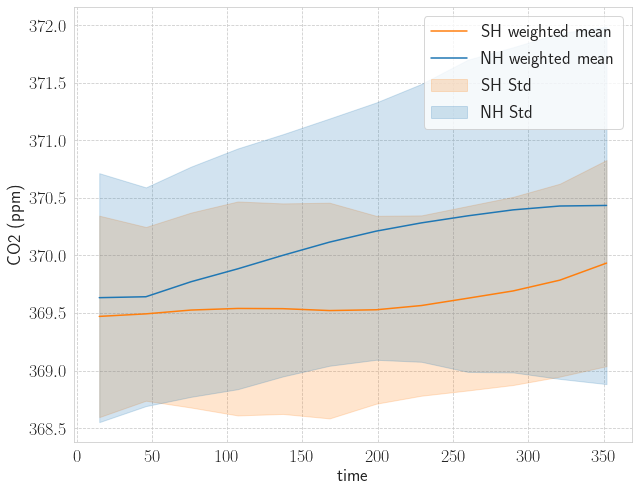

In [30]:
# ---- Prep the dataset ----
# -selections-
yv1 = ds['CO2'].where(ds.lat <= 0)  #.isel(lev=1)  #(lev=slice(1, 72))
yv2 = ds['CO2'].where(ds.lat > 0)  #.isel(lev=1) #slice(1, 72))
yv_name = ds['CO2'].long_name
yv_unit = 'ppm'

xv = ds['time']
xv_name = 'time'
xv_unit = ds['time'].attrs['units']

# -calculations-
prepped_data_1 = yv1.weighted(ds['area']).mean(dim=['lat', 'lon', 'lev'])
prepped_data_2 = yv2.weighted(ds['area']).mean(dim=['lat', 'lon', 'lev'])


# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, ax = plt.subplots(figsize=(10, 8))

# ---- prepare colors ----
north_clr = (0.122, 0.466, 0.706)  # blue
south_clr = (1, 0.498, 0.055)      # orange

# ---- Plot ----
# -south-
ph = sns.lineplot(xv, prepped_data_1,
                  ax=ax, color=south_clr, label=f'SH weighted mean')

shade_handle = plt.fill_between(xv, 
                                prepped_data_1 - yv1.std(dim=['lat', 'lon', 'lev']).values, 
                                prepped_data_1 + yv1.std(dim=['lat', 'lon', 'lev']).values, 
                                color=south_clr, alpha=0.2, label=f"SH Std")
# shade_handle = plt.fill_between(xv, 
#                                 var1.min(dim=['ncol', 'lev']).values, 
#                                 var1.max(dim=['ncol', 'lev']).values, 
#                                 color=south_clr, alpha=0.2) #, label=f"Monthly {var1_shortname} range (Satellite MERGED and OBS4MIPS)")


# -north-
ph = sns.lineplot(xv, prepped_data_2,
                  ax=ax, color=north_clr, label=f'NH weighted mean')

shade_handle = plt.fill_between(xv, 
                                prepped_data_2 - yv2.std(dim=['lat', 'lon', 'lev']).values, 
                                prepped_data_2 + yv2.std(dim=['lat', 'lon', 'lev']).values, 
                                color=north_clr, alpha=0.2, label=f"NH Std")
# shade_handle = plt.fill_between(xv, 
#                                 var2.min(dim=['ncol', 'lev']).values, 
#                                 var2.max(dim=['ncol', 'lev']).values, 
#                                 color=north_clr, alpha=0.2) #, label=f"Monthly {var1_shortname} range (Satellite MERGED and OBS4MIPS)")


# ---- Set up figure properties ----
# ylbl = '\n'.join(wrap(my_var_longname, 38))
# ax.set_xlabel(f"date")
ax.set_ylabel(f"{yv_name} ({yv_unit})")

# include only every 10th entry in the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0::10], labels=labels[0::10])
plt.legend()

# ---- Save ----
savename = 'lineplot_of_co2_timeseries_from_e3sm_hemisphere_means_' + \
            today.strftime("%Y%m%d") + '.pdf'
# plt.savefig(savename, bbox_inches='tight')

### ✅ Different fluxes

Text(0, 0.5, 'CO2 (kg/m2/s)')

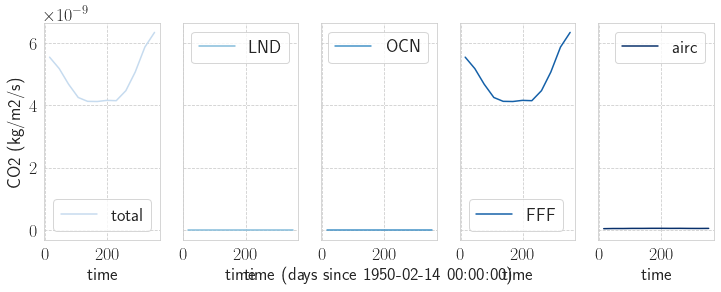

In [31]:
# ---- Prep the dataset ----
# -selections-
yv1 = ds['glsum_SFCO2']
yv2 = ds['glsum_SFCO2_LND']
yv3 = ds['glsum_SFCO2_OCN']
yv4 = ds['glsum_SFCO2_FFF']
yv5 = ds['AFCO2'].weighted(ds['area']).sum(dim=('lat', 'lon', 'lev'))
yv_name = ds['CO2'].long_name
yv_unit = 'kg/m2/s'

xv = ds['time']
xv_name = 'time'
xv_unit = ds['time'].attrs['units']


# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(12, 4), sharey=True)
# sns.despine(left=True)

# ---- Prepare colors ----
colors = plt.cm.Blues(np.linspace(0.25, 1, 5)) #len(ds['lev'])))

# ---- Plot ----
# for i, lvl in enumerate(ds['lev']):
ph = sns.lineplot(xv, yv1, ax=ax1, color=colors[0], label=f'total')
ph = sns.lineplot(xv, yv2, ax=ax2, color=colors[1], label=f'LND')
ph = sns.lineplot(xv, yv3, ax=ax3, color=colors[2], label=f'OCN')
ph = sns.lineplot(xv, yv4, ax=ax4, color=colors[3], label=f'FFF')
ph = sns.lineplot(xv, yv5, ax=ax5, color=colors[4], label=f'airc')

# ---- Set up figure properties ----
# ylbl = '\n'.join(wrap(my_var_longname, 38))
ax3.set_xlabel(f"{xv_name} ({xv_unit})")
ax1.set_ylabel(f"{yv_name} ({yv_unit})")

# include only every 10th entry in the legend
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0::10], labels=labels[0::10])

# ---- Save ----
# savename = 'lineplot_of_co2_timeseries_from_e3sm_areaweighted_' + \
#             today.strftime("%Y%m%d") + '.pdf'
# plt.savefig(savename, bbox_inches='tight')

## Diagnostics
(suggestions from Bryce, in email of Monday, August 17, 2020)

### 🟩 Timeseries budget of surface fluxes vs globally integrated CO2 mass

Do a timeseries budget of the surface fluxes (land, ocean, and fossil fuel + aircraft if you are using it) vs the globally integrated CO2 mass, make sure things are balanced the way we expect.

(For globally integrated CO2 mass, I was thinking TMCO2.  We don’t have the fluxes between each atmosphere level to do a level-by-level budget.)

<span style="color:blue">note from Bryce: </span>
*Regarding the model output, the 3D aircraft emissions are AFCO2 (= Aircraft Flux of CO2).  The vertically integrated aircraft emissions are TAFCO2 (= Total Aircraft Flux of CO2).  TAFCO2 is to AFCO2 what TMCO2 is to CO2.  If you map out the aircraft emissions you should see clear patterns of common flight paths (a lot of lines coming out of major cities).*

In [32]:
varlist_summary(co2names['2d_fluxes'])

[SFCO2] CO2 surface flux (kg/m2/s)
 sum=0.0002707056701183319
[SFCO2_LND] CO2_LND surface flux (kg/m2/s)
 sum=0.0
[SFCO2_OCN] CO2_OCN surface flux (kg/m2/s)
 sum=0.0
[SFCO2_FFF] CO2_FFF surface flux (kg/m2/s)
 sum=0.0002707056701183319
[TAFCO2] CO2 column-integrated aircraft flux (kg/m2/s)
 sum=2.9619418455695268e-06


Are aircraft emissions zero?

In [33]:
print(f"total sum for 'AFCO2': {ds['AFCO2'].sum().values.item()}")
print(f"total sum for 'TAFCO2': {ds['TAFCO2'].sum().values.item()}")

total sum for 'AFCO2': 2.961937298096018e-06
total sum for 'TAFCO2': 2.9619418455695268e-06


...no, they are low, but not quite zero.

#### ✅ $\Delta{mass}$ - change in global mass of $CO_2$ from month to month

\begin{align*}
    && \Delta \texttt{glsum_TMCO2}_{t} = \texttt{glsum_TMCO2}_{t} - \texttt{glsum_TMCO2}_{t-1} && \forall t
\end{align*}

note: using TMCO2_FFF instead of TMCO2 because it is instantaneous value at end of month instead of a monthly mean

<span style="color:blue">note from Bryce: </span>
*When the output is specified to be written as instantaneous, then the value is equal to whatever the model value is when the output is written.  For monthly output, that would be at the end of the month.  Since SFCO2 = SFCO2_FFF (because the land and ocean fluxes are zero), then TMCO2 should be equal to TMCO2_FFF.  However, since TMCO2 is written out as a monthly average while TMCO2_FFF is equal to the value of TMCO2_FFF at the end of the month, they will differ some.  The change in TMCO2_FFF from the end of one month to the end of the next month should be exactly equal to the time-integrated fluxes of SFCO2_FFF over the course of that month (technically equal up to the numerical precision of the output data).*

In [34]:
arr_delta_tmco2 = np.insert(np.diff(ds['glsum_TMCO2_FFF']), 0, 0)  # backward difference

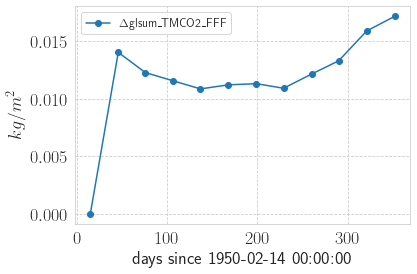

In [35]:
plt.plot(ds['time'], arr_delta_tmco2, '-o', 
         label="$\Delta$" + tex_escape('glsum_TMCO2_FFF'))
#
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2$")
plt.legend(fontsize=12)
plt.show()

Let's try with the native-grid file...  *(using almost the same variable names as in Bryce's notebook "Testing_co2_kaufdata_2")*

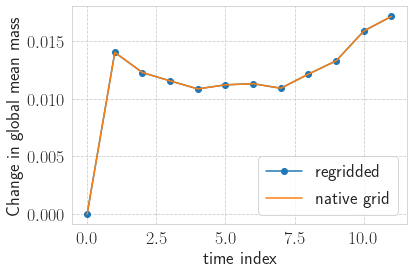

Differences:


array([ 6.66344135e-09, -1.56224189e-08, -1.02650688e-09,  1.90035507e-08,
       -5.38580025e-09, -1.05976738e-08,  4.99233010e-09,  2.75190359e-09,
       -8.05340505e-09,  2.46681964e-09, -3.23329630e-09])

In [36]:
plt.plot(arr_delta_tmco2, '-o',
         label="regridded")
plt.plot(np.insert(ds_nat['glsum_TMCO2_FFF'].diff('time'), 0, 0), 
         '-', label='native grid')
plt.xlabel("time index")
plt.ylabel('Change in global mean mass')
plt.legend()
plt.show()

print("Differences:")
(ds_nat['glsum_TMCO2_FFF'].diff('time') - np.diff(ds['glsum_TMCO2_FFF'])).values

#### 🟩 $\int{flux}$ - time-integrated flux of $CO_2$ from surface emissions and aircraft

\begin{align*}
    && \int_{t-1}^{t} \texttt{SFCO2} \approx & \texttt{glsum_SFCO2}_{t} & * & \quad (time_t - time_{t-1})    &&\forall t, \\
    with\,units: && \{kg/m^2\}_t= & \{kg/m^2/s\}_t& * & \quad \{s\}_{t}    &&\forall t. \\
\end{align*}


In [37]:
seconds_per_day = 24 * 60 * 60
arr_delta_days = np.diff(np.insert(ds['time'].values, 0, 0))
dtime = arr_delta_days * seconds_per_day
#
arr_int_sfco2 = ds['glsum_SFCO2'] * dtime
#
arr_int_aircraftco2 = ds['glsum_TAFCO2'] * dtime
#
print(dtime)

[1296000. 2678400. 2592000. 2678400. 2592000. 2678400. 2678400. 2592000.
 2678400. 2592000. 2678400. 2678400.]


Need to include aircraft emissions as well

In [38]:
arr_int_totalemissionsflux = arr_int_sfco2 + arr_int_aircraftco2

Here is the difference between including and not including the aircraft fluxes...

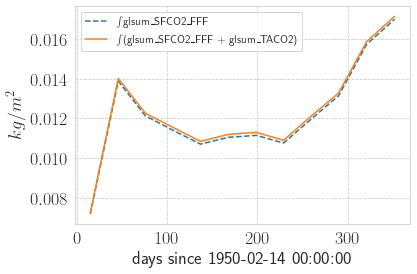

Differences:


array([-5.81154497e-05, -1.33757498e-04, -1.29235584e-04, -1.44305381e-04,
       -1.39098969e-04, -1.50283783e-04, -1.51102183e-04, -1.40640336e-04,
       -1.48669317e-04, -1.36618594e-04, -1.39022603e-04, -1.44876388e-04])

In [39]:
plt.plot(ds['time'], arr_int_sfco2, '--', 
         label="$\int$" + tex_escape('glsum_SFCO2_FFF'))
#
plt.plot(ds['time'], arr_int_totalemissionsflux, '-', 
         label="$\int$" + tex_escape('(glsum_SFCO2_FFF + glsum_TACO2)'))
#
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2$")
plt.legend(fontsize=11)
plt.show()

print("Differences:")
(arr_int_sfco2 - arr_int_totalemissionsflux).values

Let's try with the native-grid file...  *(using almost the same variable names as in Bryce's notebook "Testing_co2_kaufdata_2")*

In [40]:
dtime_nat = (ds_nat['time_bnds'].diff('nbnd') * 1e-9).astype('int').isel(nbnd=0)
print(dtime_nat.values)

[1296000 2678400 2592000 2678400 2592000 2678400 2678400 2592000 2678400
 2592000 2678400 2678400]


In [41]:
arr_int_totalemissionsflux_nat = ((ds_nat['glsum_SFCO2'] + ds_nat['glsum_TAFCO2']) * dtime_nat).isel(time=slice(1,13))

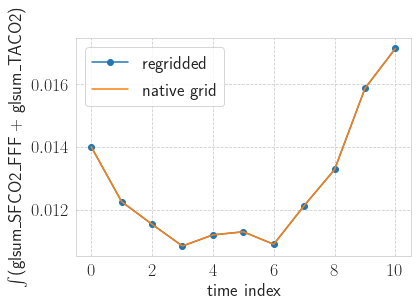

Differences:


array([-1.94804364e-11,  9.40593436e-12,  1.29160519e-11,  5.32962563e-13,
       -9.89366575e-13, -4.97701706e-12,  7.05184695e-12, -4.06648500e-12,
        6.22543683e-13, -2.33658856e-11, -1.74491879e-11])

In [42]:
plt.plot(arr_int_totalemissionsflux[1:], '-o', label="regridded")
plt.plot(arr_int_totalemissionsflux_nat, '-', label='native grid')
plt.xlabel("time index")
plt.ylabel("$\int$" + tex_escape('(glsum_SFCO2_FFF + glsum_TACO2)'))
plt.legend()
plt.show()

print("Differences:")
arr_int_totalemissionsflux[1:].values - arr_int_totalemissionsflux_nat.values

A nicer graphic here...

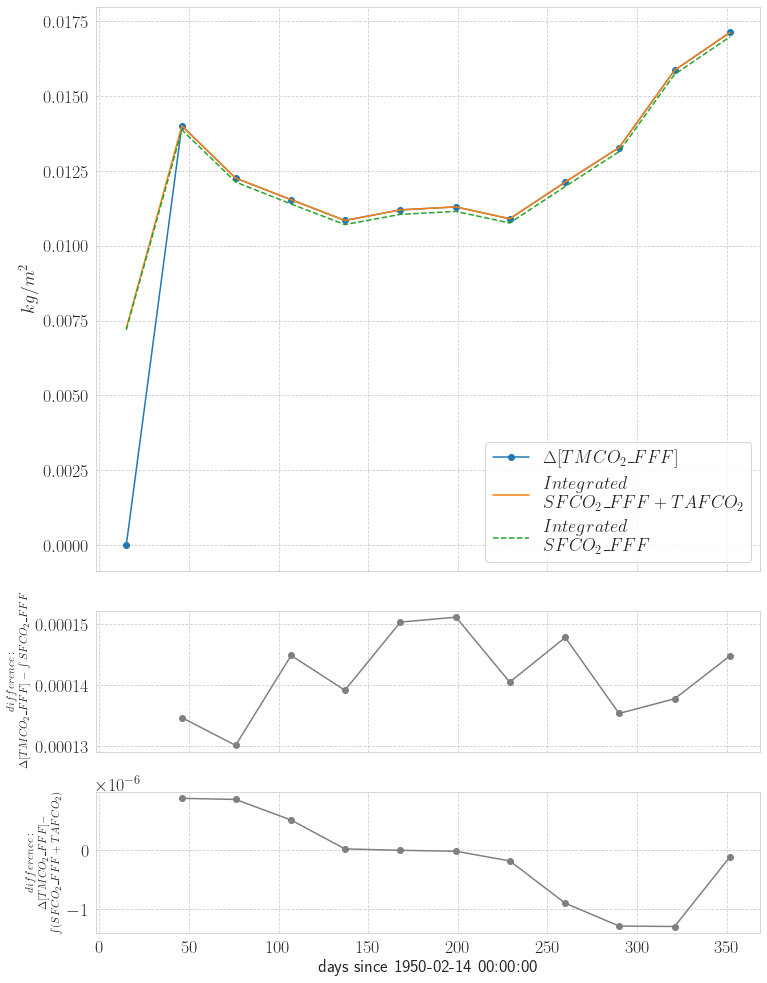

In [43]:
# --- Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [4, 1, 1]},
                                    figsize=(11, 14))
#
ax1.plot(ds['time'], arr_delta_tmco2, '-o', label='$\Delta[TMCO_2\_FFF]$')
ax1.plot(ds['time'], arr_int_sfco2+arr_int_aircraftco2, '-', label='$Integrated$\n$SFCO_2\_FFF+TAFCO_2$')
ax1.plot(ds['time'], arr_int_sfco2, '--', label='$Integrated$\n$SFCO_2\_FFF$')
ax1.set_ylabel('$kg/m^2$')
ax1.legend()
#
ax2.plot(ds['time'][1:], arr_delta_tmco2[1:]-(arr_int_sfco2.values[1:]), 
         color='gray', marker='o', label='$Difference$')
ax2.set_ylabel('$difference:$\n$\Delta[TMCO_2\_FFF]-\int SFCO_2\_FFF$',
              fontsize=11)
#
ax3.plot(ds['time'][1:], arr_delta_tmco2[1:]-(arr_int_sfco2.values[1:]+arr_int_aircraftco2[1:]), 
         color='gray', marker='o', label='$Difference$')
ax3.set_ylabel('$difference:$\n$\Delta[TMCO_2\_FFF]-$\n$\int (SFCO_2\_FFF+TAFCO_2)$',
              fontsize=11)
ax3.set_xlabel(f"{ds['time'].attrs['units']}")

# --- export ---
plt.tight_layout()
savename = 'lineplot_of_co2fff_flux_vs_mass_timeseries_with_differences_from_e3sm_' + \
            today.strftime("%Y%m%d") + '_3.pdf'
# plt.savefig(savename, bbox_inches='tight')

#### 🟩 Comparison of mass changes with integrated fluxes

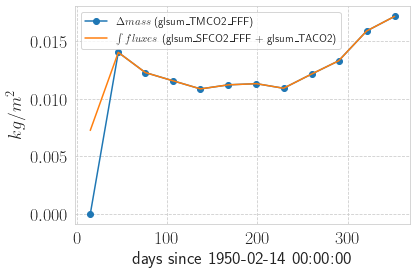

In [44]:
plt.plot(ds['time'], arr_delta_tmco2, '-o', 
         label="$\Delta mass$" + tex_escape(' (glsum_TMCO2_FFF)'))
#
plt.plot(ds['time'], arr_int_totalemissionsflux, '-', 
         label="$\int fluxes$" + tex_escape(' (glsum_SFCO2_FFF + glsum_TACO2)'))
#
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2$")
plt.legend(fontsize=11)
plt.show()

What does the difference between these lines look like?

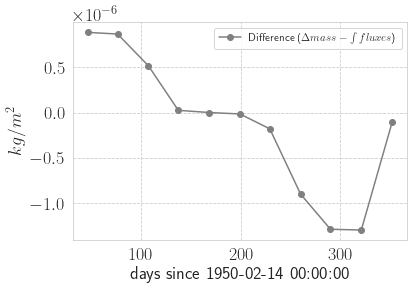

In [45]:
plt.plot(ds['time'][1:], arr_delta_tmco2[1:] - arr_int_totalemissionsflux[1:], '-o', color='gray', 
         label="Difference ($\Delta mass - \int fluxes$)")
#
plt.xlabel(f"{ds['time'].attrs['units']}")
plt.ylabel(f"$kg/m^2$")
plt.legend(fontsize=11)
plt.show()

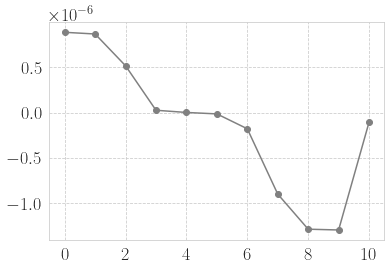

In [46]:
# Here's the way it was calculated in Bryce's notebook.  Should be exactly the same
tempa   = ((ds['glsum_SFCO2'] + ds['glsum_TAFCO2']) * dtime).isel(time=slice(1,13))
tempb   = ds['glsum_TMCO2_FFF'].diff('time')
tot_err = tempb - tempa
plt.plot(tot_err, '-o', color='gray')

How about the difference when looking at just the native-grid file?

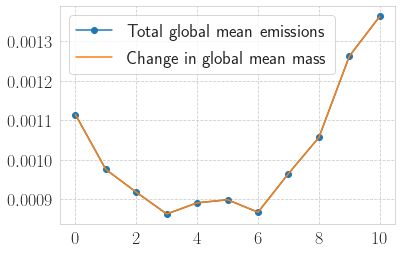

In [47]:
plt.plot(((ds_nat['gl_SFCO2'] + ds_nat['gl_TAFCO2']) * dtime_nat).isel(time=slice(1,13)), '-o', label='Total global mean emissions')
plt.plot(ds_nat['gl_TMCO2_FFF'].diff('time'), label='Change in global mean mass')
plt.legend()

In [48]:
tempa   = ((ds_nat['gl_SFCO2'] + ds_nat['gl_TAFCO2']) * dtime_nat).isel(time=slice(1,13))
tempb   = ds_nat['gl_TMCO2_FFF'].diff('time')
tot_err_nat = tempb - tempa
rel_err_nat = (tempb - tempa) / tempb

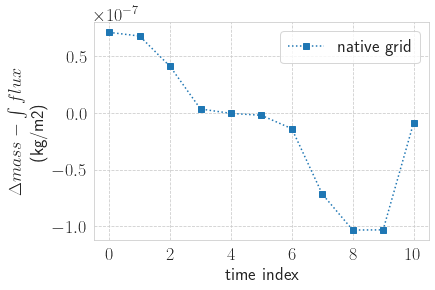

In [50]:
plt.plot(tot_err_nat, ':s', label="native grid")
plt.xlabel("time index")
plt.ylabel("$\Delta mass - \int flux$\n(kg/m2)")
plt.legend()
plt.show()

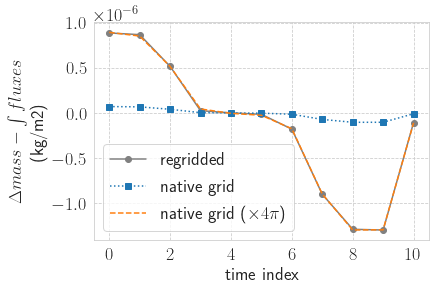

In [224]:
plt.plot(arr_delta_tmco2[1:] - arr_int_totalemissionsflux[1:], '-o', color='gray', label="regridded")
plt.plot(tot_err_nat, ':s', label="native grid")
plt.plot(tot_err_nat * 4*np.pi, '--', label=r"native grid ($\times 4\pi$)")
plt.xlabel("time index")
plt.ylabel("$\Delta mass - \int fluxes$\n(kg/m2)")
plt.legend()
plt.show()

How about calculating the difference and integrals for the native grid in the exact same way I did for the regridded file...

In [160]:
arr_delta_tmco2_nat = np.insert(np.diff(ds_nat['gl_TMCO2_FFF']), 0, 0)  # backward difference

In [162]:
dtime_nat

<xarray.DataArray 'time_bnds' (time: 12, nbnd: 1)>
array([[1296000],
       [2678400],
       [2592000],
       [2678400],
       [2592000],
       [2678400],
       [2678400],
       [2592000],
       [2678400],
       [2592000],
       [2678400],
       [2678400]])
Coordinates:
  * time     (time) object 1950-03-01 00:00:00 ... 1951-02-01 00:00:00
Dimensions without coordinates: nbnd

In [158]:
arr_int_sfco2_nat = ds_nat['gl_SFCO2'] * dtime_nat
#
arr_int_aircraftco2_nat = ds_nat['gl_TAFCO2'] * dtime_nat
#
arr_int_totalemissionsflux_nat = arr_int_sfco2 + arr_int_aircraftco2

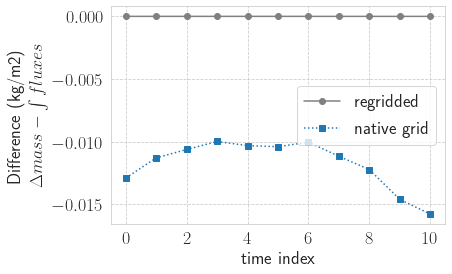

In [161]:
plt.plot(arr_delta_tmco2[1:] - arr_int_totalemissionsflux[1:], '-o', color='gray', 
         label="regridded")
plt.plot(arr_delta_tmco2_nat[1:] - arr_int_totalemissionsflux_nat[1:], ':s', label="native grid")
plt.xlabel("time index")
plt.ylabel("Difference (kg/m2)\n$\Delta mass - \int fluxes$")
plt.legend()

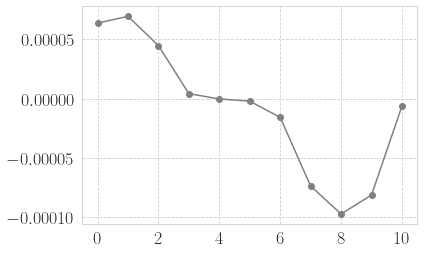

In [122]:
plt.plot(rel_err_nat, '-o', color='gray')

#### How about comparing weighted means vs. sums ...

is the weighted() method doing the same thing as multiplying by 'area' like it seems it should?

In [57]:
tempa = (ds['TMCO2_FFF']*ds['area']).sum(('lon', 'lat')).values
tempb = ds['TMCO2_FFF'].weighted(ds['area']).sum(('lon', 'lat')).values
tempa - tempb

array([ 5.68434189e-14,  1.42108547e-14, -2.84217094e-14,  1.42108547e-14,
        1.42108547e-14,  1.42108547e-14,  2.84217094e-14,  7.10542736e-14,
       -1.42108547e-14,  2.84217094e-14,  0.00000000e+00,  1.42108547e-14])

In [75]:
# Constants are declared.
r_earth = 6.37122e6  # value from the Common Infrastructure for Modeling the Earth (CIME)
surface_area_earth = 4*np.pi*r_earth**2surface_area_earth

The `area` variable has units of steradians or ($\frac{m^2}{m^2}$).  
There are $4\pi$ steradians in a sphere.

But to get the total surface area, one needs to multiply by the sphere's radius squared, i.e.
$4\pi r^2$

In [99]:
display(ds['area'].attrs)

total_steradian_area = ds['area'].sum().values.item()
total_steradian_area == 4*np.pi

{'long_name': 'Solid angle subtended by gridcell',
 'standard_name': 'solid_angle',
 'units': 'steradian',
 'cell_mathods': 'lat, lon: sum'}

True

In [95]:
# What is the difference between the weighted sum and weighted mean?
tempa = ds['TMCO2_FFF'].weighted(ds['area']).sum(('lon', 'lat')).values
tempb = ds['TMCO2_FFF'].weighted(ds['area']).mean(('lat','lon')).values

display(tempa)
display(tempb * total_steradian_area)

array([70.74832626, 70.76233458, 70.77459397, 70.78613166, 70.79697576,
       70.80817343, 70.81947022, 70.83036989, 70.84249779, 70.85577511,
       70.87163724, 70.8887678 ])

array([70.74832626, 70.76233458, 70.77459397, 70.78613166, 70.79697576,
       70.80817343, 70.81947022, 70.83036989, 70.84249779, 70.85577511,
       70.87163724, 70.8887678 ])

In [89]:
tempa = ds['SFCO2_FFF'].weighted(ds['area']).sum(('lon', 'lat')).values
tempb = ds['SFCO2_FFF'].weighted(ds['area']).mean(('lat','lon')).values

display(tempa)
display(tempb * ds['area'].sum().values.item())

array([5.54769812e-09, 5.17983824e-09, 4.67950862e-09, 4.25360993e-09,
       4.13000374e-09, 4.12462214e-09, 4.16132779e-09, 4.15092934e-09,
       4.47286861e-09, 5.07021108e-09, 5.87082038e-09, 6.34176939e-09])

array([5.54769812e-09, 5.17983824e-09, 4.67950862e-09, 4.25360993e-09,
       4.13000374e-09, 4.12462214e-09, 4.16132779e-09, 4.15092934e-09,
       4.47286861e-09, 5.07021108e-09, 5.87082038e-09, 6.34176939e-09])

In [92]:
display(ds['area'].attrs)

{'long_name': 'Solid angle subtended by gridcell',
 'standard_name': 'solid_angle',
 'units': 'steradian',
 'cell_mathods': 'lat, lon: sum'}

Here we'll just make a nice looking graphic...

In [ ]:
# --- Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [4, 1, 1]},
                                    figsize=(11, 14))
#
ax1.plot(ds['time'], arr_delta_tmco2, '-o', label='$\Delta[TMCO_2\_FFF]$')
ax1.plot(ds['time'], arr_int_sfco2+arr_int_aircraftco2, '-', label='$Integrated$\n$SFCO_2\_FFF+TAFCO_2$')
ax1.plot(ds['time'], arr_int_sfco2, '--', label='$Integrated$\n$SFCO_2\_FFF$')
ax1.set_ylabel('$kg$')
ax1.legend()
#
ax2.plot(ds['time'][1:], arr_delta_tmco2[1:]-(arr_int_sfco2.values[1:]), 
         color='gray', marker='o', label='$Difference$')
ax2.set_ylabel('$difference:$\n$\Delta[TMCO_2\_FFF]-\int SFCO_2\_FFF$',
              fontsize=11)
#
ax3.plot(ds['time'][1:], arr_delta_tmco2[1:]-(arr_int_sfco2.values[1:]+arr_int_aircraftco2[1:]), 
         color='gray', marker='o', label='$Difference$')
ax3.set_ylabel('$difference:$\n$\Delta[TMCO_2\_FFF]-$\n$\int (SFCO_2\_FFF+TAFCO_2)$',
              fontsize=11)
ax3.set_xlabel(f"{ds['time'].attrs['units']}")

# --- export ---
plt.tight_layout()
savename = 'lineplot_of_co2fff_flux_vs_mass_timeseries_with_differences_from_e3sm_' + \
            today.strftime("%Y%m%d") + '_3.pdf'
# plt.savefig(savename, bbox_inches='tight')

### 🟩 Check ocean fluxes

I think the ocean fluxes are not turned on in the run you have done.  If that is true, then make a plot similar to the one you have but restricted over the ocean to see if the lev=0 discontinuity disappears.  If ocean fluxes are non-zero, maybe there is a region over ice where the surface fluxes are sufficiently close to zero and the lev=0 anomaly also disappears.

(There should be a LANDFRAC variable (there might be OCNFRAC or something like that too) which is the fraction of land in each grid cell.  If you mask by LANDFRAC == 0 you can restrict to ocean only grid cells (sea ice might be in there too, but that isn’t much area).)

In [ ]:
# ---- Prep the dataset ----
# -selections-
yv1 = ds['CO2'].where(ds['OCNFRAC']==1)  # Over ocean
yv2 = ds['CO2'].where(ds['OCNFRAC']==0)  # Over land
yv_name = ds['CO2'].long_name
yv_unit = 'ppm'

xv = ds['time']
xv_name = 'time'
xv_unit = ds['time'].attrs['units']

# -calculations-
prepped_y1 = yv1.weighted(ds['area']).mean(dim=['lat', 'lon'])
prepped_y2 = yv2.weighted(ds['area']).mean(dim=['lat', 'lon'])


# ---- Set up Figure ----
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 12), sharey=True)

# ---- Prepare colors ----
colors = plt.cm.Blues(np.linspace(0.25, 1, len(ds['lev'])))

# ---- Plot ----
for i, lvl in enumerate(ds['lev']):
    
    if i>1:
        break
        
    if i==0:
        tempcolor = 'r'
    else:
        tempcolor = colors[i]
    ph = sns.lineplot(xv, prepped_y1.isel(lev=i), ax=ax1, 
                      color=tempcolor, label=f'lev {i}')
    ph = sns.lineplot(xv, prepped_y2.isel(lev=i), ax=ax2, 
                      color=tempcolor, label=f'lev {i}')

# ---- Set up figure properties ----
# ylbl = '\n'.join(wrap(my_var_longname, 38))
ax1.set_title("Over ocean")
ax2.set_title("Over land")
ax1.set_xlabel(f"{xv_name} ({xv_unit})")
ax2.set_xlabel(f"{xv_name} ({xv_unit})")
ax1.set_ylabel(f"{yv_name} ({yv_unit})")
# ax.set_ylim((365.5, 372))

ax1.set_ylim((365.33220813631317, 372.21347936773435))
ax2.set_ylim((365.33220813631317, 372.21347936773435))

# include only every 10th entry in the legend
# handles, labels = ax1.get_legend_handles_labels()
# ax1.legend(handles=handles[0::10], labels=labels[0::10], prop={"size":10})
ax1.legend(prop={"size":10})
ax2.get_legend().remove()

# ---- Save ----
savename = 'lineplot_of_meanco2_timeseries_from_e3sm_areaweighted_maskedWithOCNFRAC_lev1and2' + \
            today.strftime("%Y%m%d") + '.pdf'
# plt.savefig(savename, bbox_inches='tight')

### 🟩 Zonal mean vs pressure/altitude

It would be interested to take a look at a zonal mean vs pressure/altitude figure to see what the distribution of CO2 looks like in space.  The model uses a hybrid sigma-pressure coordinate system in the vertical, and the 3D pressure field isn’t output directly but can be reconstructed using the hybrid weights and surface pressure.  The midpoint pressures are P0 * hyam + PS * hybm and the level interface pressures are the same but using hyai and hybi.  I have a pair of python routines for doing this below.  If you just average all levels zonally, you will get weird things happening in the latitude bands with tall mountains because the levels get squished together over mountains.